# Measuring gerrymandering

<a href="https://colab.research.google.com/github/warwickdatascience/subject-examples/blob/master/python/politics/politics.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

### Problem Statement

Gerrymandering is the process of creating voting districts in such a way that an unfair advantage is given to one party. In this notebook, we will calculate to what degree various states in the US are gerrymandered. We do this by counting how many votes are _wasted_ by each party. A vote is considered wasted if it was for the losing party of a given district, or it was surplus to requirement. For example, in a fictional district where the Democrats gained $1000$ votes and the Republicans gained $1500$, the Democrats would have $1000$ wasted votes, and the Republicans would have $499$ (they only needed $1001$ to win).

### Resources

We will import our data from [this](http://nifty.stanford.edu/2019/obourn-gerrymandering/inputFiles/districts.txt) file, giving the number of Democrat and Republican votes for the discricts of various states. Each line corresponds to a single state and gives the district name, Democrat, vote count and Republican vote count or each district in repeated triples.

### Non-course Techniques

We use a package called `matplotlib` to create the final visualisation, but all other code is taken from the course.

## Setup

We begin by importing any relevant modules and setting the graphical parameters for `matplotlib`.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'figure.facecolor': 'white'})

## Import

We start by reading the supplied data into a list of lines.

In [19]:
with open('districts.txt') as f:
    lines = f.read().split('\n')
    # Remove empty final line
    del lines[-1]
    # Some lines (e.g. New York) have trailing commas which need to be removed
    for i, l in enumerate(lines):
        if l[-1] == ',':
            lines[i] = l[:-1]

We can then loop through these lines to count how many votes are wasted by each party in each state.

In [21]:
vote_counts = {}
for l in lines:
    entries = l.split(',')
    state = entries[0]
    wasted_dem, wasted_gop, tot_votes = 0, 0, 0
    for i in range(1, len(entries), 3):  # read each triple
        district = entries[i]
        dem = int(entries[i+1])
        gop = int(entries[i+2])
        tot_votes += dem + gop
        if dem > gop:
            wasted_dem += dem - (gop + 1)
            wasted_gop += gop
        elif gop > dem:
            wasted_dem += dem
            wasted_gop += gop - (dem + 1)
    vote_counts[state] = {
        'wasted_dem': wasted_dem,
        'wasted_gop': wasted_gop,
        'tot_votes': tot_votes
    }

We use this to print out information related to gerrymandering for any state.

In [22]:
vote_counts['Virginia']

{'wasted_dem': 706330, 'wasted_gop': 671879, 'tot_votes': 1989686}

## Visualisation

We can now visualise the degree of gerrymandering by creating a bar plot of the ratio between wasted votes and total votes.

In [73]:
state_list, deg_gerrymandering, favour_of = [], [], []
for state, votes in vote_counts.items():
    state_list.append(state)
    deg_gerrymandering.append(
        ((votes['wasted_dem'] + votes['wasted_gop']) / votes['tot_votes'] - 0.5) * 2
    )
    if votes['wasted_dem'] > votes['wasted_gop']:
        favour_of.append('dem')
    else:
        favour_of.append('gop')
    
# Sort lists together by degree of gerrymandering
state_list = [s for d, s in sorted(zip(deg_gerrymandering, state_list))]
deg_gerrymandering.sort()

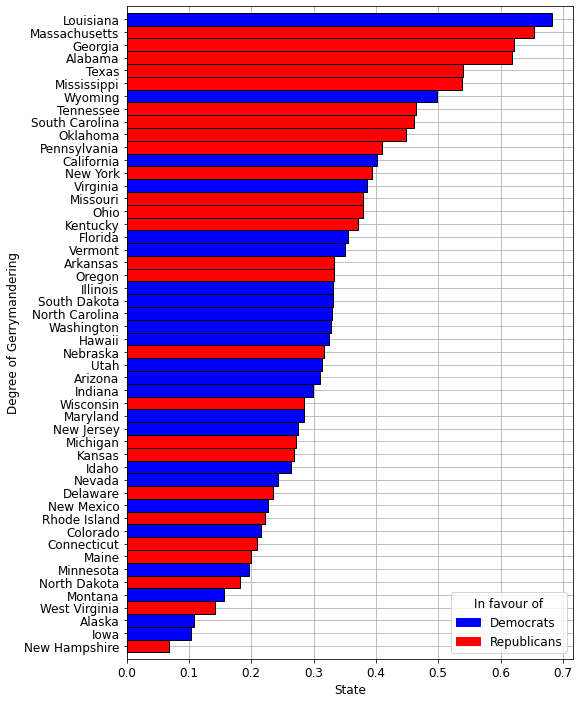

In [82]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.barh(state_list, deg_gerrymandering,
         color = ['red' if f == 'gop' else 'blue' for f in favour_of],
         height=1, edgecolor='k')
ax.set_xlabel('State')
ax.set_ylabel('Degree of Gerrymandering')
ax.set_ylim(-1, len(state_list))
ax.grid()
ax.set_axisbelow(True)
# Add legend
labels = ['Democrats', 'Republicans']
handles = [plt.Rectangle((0,0), 1, 1, color=c) for c in ('blue', 'red')]
plt.legend(handles, labels, title='In favour of')
plt.show()